## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9948382	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9743959	total: 60ms	remaining: 29.9s
2:	learn: 0.9540698	total: 60.9ms	remaining: 20.2s
3:	learn: 0.9372587	total: 62ms	remaining: 15.4s
4:	learn: 0.9222262	total: 63ms	remaining: 12.5s
5:	learn: 0.9051087	total: 64ms	remaining: 10.6s
6:	learn: 0.8887800	total: 65ms	remaining: 9.22s
7:	learn: 0.8722563	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8576028	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8420390	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8271554	total: 68.4ms	remaining: 6.15s
11:	learn: 0.8131829	total: 69.3ms	remaining: 5.7s
12:	learn: 0.7981063	total: 70.3ms	remaining: 5.34s
13:	learn: 0.7834478	total: 71.1ms	remaining: 5.01s
14:	learn: 0.7702286	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7581257	total: 72.8ms	remaining: 4.47s
16:	learn: 0.7467828	total: 73.6ms	remaining: 4.25s
17:	learn: 0.7345640	total: 74.3ms	remaining: 4.06s
18:	learn: 0.7226270	total: 75.1ms	remaining: 3.88s
19:

58:	learn: 0.4355133	total: 110ms	remaining: 1.75s
59:	learn: 0.4304792	total: 111ms	remaining: 1.74s
60:	learn: 0.4270799	total: 112ms	remaining: 1.72s
61:	learn: 0.4232584	total: 113ms	remaining: 1.7s
62:	learn: 0.4194320	total: 113ms	remaining: 1.68s
63:	learn: 0.4151377	total: 114ms	remaining: 1.67s
64:	learn: 0.4111133	total: 115ms	remaining: 1.65s
65:	learn: 0.4081928	total: 116ms	remaining: 1.64s
66:	learn: 0.4045422	total: 117ms	remaining: 1.62s
67:	learn: 0.4016724	total: 118ms	remaining: 1.61s
68:	learn: 0.3987797	total: 118ms	remaining: 1.6s
69:	learn: 0.3957331	total: 119ms	remaining: 1.58s
70:	learn: 0.3920600	total: 120ms	remaining: 1.57s
71:	learn: 0.3883140	total: 121ms	remaining: 1.56s
72:	learn: 0.3847556	total: 122ms	remaining: 1.55s
73:	learn: 0.3813782	total: 123ms	remaining: 1.53s
74:	learn: 0.3776482	total: 123ms	remaining: 1.52s
75:	learn: 0.3750017	total: 124ms	remaining: 1.51s
76:	learn: 0.3723101	total: 125ms	remaining: 1.5s
77:	learn: 0.3693887	total: 126ms	

155:	learn: 0.2569373	total: 192ms	remaining: 1.04s
156:	learn: 0.2557631	total: 193ms	remaining: 1.04s
157:	learn: 0.2549080	total: 194ms	remaining: 1.03s
158:	learn: 0.2536432	total: 195ms	remaining: 1.03s
159:	learn: 0.2524081	total: 195ms	remaining: 1.02s
160:	learn: 0.2517476	total: 196ms	remaining: 1.02s
161:	learn: 0.2510308	total: 197ms	remaining: 1.02s
162:	learn: 0.2504265	total: 198ms	remaining: 1.01s
163:	learn: 0.2497101	total: 198ms	remaining: 1.01s
164:	learn: 0.2492166	total: 199ms	remaining: 1.01s
165:	learn: 0.2485394	total: 200ms	remaining: 1s
166:	learn: 0.2476834	total: 201ms	remaining: 1s
167:	learn: 0.2469949	total: 202ms	remaining: 1s
168:	learn: 0.2464243	total: 203ms	remaining: 998ms
169:	learn: 0.2458657	total: 204ms	remaining: 995ms
170:	learn: 0.2453037	total: 205ms	remaining: 993ms
171:	learn: 0.2446117	total: 206ms	remaining: 991ms
172:	learn: 0.2440159	total: 207ms	remaining: 988ms
173:	learn: 0.2432506	total: 208ms	remaining: 985ms
174:	learn: 0.2424613

280:	learn: 0.1829845	total: 300ms	remaining: 767ms
281:	learn: 0.1824901	total: 301ms	remaining: 765ms
282:	learn: 0.1819081	total: 301ms	remaining: 764ms
283:	learn: 0.1814069	total: 302ms	remaining: 762ms
284:	learn: 0.1810291	total: 303ms	remaining: 761ms
285:	learn: 0.1806159	total: 304ms	remaining: 759ms
286:	learn: 0.1803258	total: 305ms	remaining: 757ms
287:	learn: 0.1796909	total: 306ms	remaining: 756ms
288:	learn: 0.1793200	total: 306ms	remaining: 754ms
289:	learn: 0.1790831	total: 307ms	remaining: 752ms
290:	learn: 0.1785424	total: 308ms	remaining: 750ms
291:	learn: 0.1781760	total: 309ms	remaining: 749ms
292:	learn: 0.1778029	total: 310ms	remaining: 747ms
293:	learn: 0.1773260	total: 311ms	remaining: 746ms
294:	learn: 0.1767721	total: 311ms	remaining: 744ms
295:	learn: 0.1764579	total: 312ms	remaining: 742ms
296:	learn: 0.1762606	total: 313ms	remaining: 741ms
297:	learn: 0.1756830	total: 314ms	remaining: 739ms
298:	learn: 0.1751390	total: 315ms	remaining: 737ms
299:	learn: 

359:	learn: 0.1531640	total: 367ms	remaining: 652ms
360:	learn: 0.1527453	total: 368ms	remaining: 651ms
361:	learn: 0.1524842	total: 368ms	remaining: 649ms
362:	learn: 0.1522785	total: 369ms	remaining: 648ms
363:	learn: 0.1519681	total: 370ms	remaining: 647ms
364:	learn: 0.1516333	total: 371ms	remaining: 645ms
365:	learn: 0.1513360	total: 372ms	remaining: 644ms
366:	learn: 0.1511707	total: 372ms	remaining: 642ms
367:	learn: 0.1507976	total: 373ms	remaining: 641ms
368:	learn: 0.1505415	total: 374ms	remaining: 640ms
369:	learn: 0.1501875	total: 375ms	remaining: 639ms
370:	learn: 0.1497896	total: 376ms	remaining: 637ms
371:	learn: 0.1492604	total: 376ms	remaining: 636ms
372:	learn: 0.1489010	total: 377ms	remaining: 634ms
373:	learn: 0.1484743	total: 378ms	remaining: 633ms
374:	learn: 0.1480888	total: 379ms	remaining: 632ms
375:	learn: 0.1477860	total: 380ms	remaining: 631ms
376:	learn: 0.1474810	total: 381ms	remaining: 630ms
377:	learn: 0.1470831	total: 382ms	remaining: 629ms
378:	learn: 

487:	learn: 0.1207719	total: 475ms	remaining: 498ms
488:	learn: 0.1206437	total: 476ms	remaining: 497ms
489:	learn: 0.1202178	total: 477ms	remaining: 496ms
490:	learn: 0.1201318	total: 478ms	remaining: 495ms
491:	learn: 0.1199865	total: 479ms	remaining: 494ms
492:	learn: 0.1198545	total: 480ms	remaining: 493ms
493:	learn: 0.1197248	total: 481ms	remaining: 492ms
494:	learn: 0.1193393	total: 481ms	remaining: 491ms
495:	learn: 0.1191824	total: 482ms	remaining: 490ms
496:	learn: 0.1187715	total: 483ms	remaining: 489ms
497:	learn: 0.1187343	total: 484ms	remaining: 488ms
498:	learn: 0.1186082	total: 485ms	remaining: 487ms
499:	learn: 0.1184469	total: 486ms	remaining: 486ms
500:	learn: 0.1182912	total: 486ms	remaining: 485ms
501:	learn: 0.1180266	total: 487ms	remaining: 483ms
502:	learn: 0.1177573	total: 488ms	remaining: 482ms
503:	learn: 0.1174674	total: 489ms	remaining: 481ms
504:	learn: 0.1172403	total: 490ms	remaining: 480ms
505:	learn: 0.1169977	total: 490ms	remaining: 479ms
506:	learn: 

585:	learn: 0.1032648	total: 557ms	remaining: 394ms
586:	learn: 0.1032339	total: 558ms	remaining: 393ms
587:	learn: 0.1031822	total: 559ms	remaining: 392ms
588:	learn: 0.1029310	total: 560ms	remaining: 390ms
589:	learn: 0.1028084	total: 561ms	remaining: 390ms
590:	learn: 0.1027537	total: 561ms	remaining: 389ms
591:	learn: 0.1027211	total: 562ms	remaining: 387ms
592:	learn: 0.1026432	total: 563ms	remaining: 386ms
593:	learn: 0.1024260	total: 564ms	remaining: 386ms
594:	learn: 0.1023669	total: 565ms	remaining: 385ms
595:	learn: 0.1021905	total: 566ms	remaining: 383ms
596:	learn: 0.1019433	total: 567ms	remaining: 382ms
597:	learn: 0.1018535	total: 567ms	remaining: 381ms
598:	learn: 0.1016649	total: 568ms	remaining: 380ms
599:	learn: 0.1014704	total: 569ms	remaining: 379ms
600:	learn: 0.1013514	total: 570ms	remaining: 378ms
601:	learn: 0.1011851	total: 571ms	remaining: 377ms
602:	learn: 0.1011355	total: 571ms	remaining: 376ms
603:	learn: 0.1009346	total: 572ms	remaining: 375ms
604:	learn: 

715:	learn: 0.0862086	total: 665ms	remaining: 264ms
716:	learn: 0.0861245	total: 666ms	remaining: 263ms
717:	learn: 0.0859251	total: 667ms	remaining: 262ms
718:	learn: 0.0857243	total: 668ms	remaining: 261ms
719:	learn: 0.0855949	total: 669ms	remaining: 260ms
720:	learn: 0.0855725	total: 670ms	remaining: 259ms
721:	learn: 0.0854804	total: 670ms	remaining: 258ms
722:	learn: 0.0852951	total: 671ms	remaining: 257ms
723:	learn: 0.0850917	total: 672ms	remaining: 256ms
724:	learn: 0.0849734	total: 673ms	remaining: 255ms
725:	learn: 0.0849397	total: 674ms	remaining: 254ms
726:	learn: 0.0848423	total: 674ms	remaining: 253ms
727:	learn: 0.0847403	total: 675ms	remaining: 252ms
728:	learn: 0.0846338	total: 676ms	remaining: 251ms
729:	learn: 0.0845932	total: 677ms	remaining: 250ms
730:	learn: 0.0844009	total: 678ms	remaining: 249ms
731:	learn: 0.0843072	total: 679ms	remaining: 248ms
732:	learn: 0.0841821	total: 680ms	remaining: 248ms
733:	learn: 0.0841571	total: 681ms	remaining: 247ms
734:	learn: 

815:	learn: 0.0746087	total: 748ms	remaining: 169ms
816:	learn: 0.0744518	total: 749ms	remaining: 168ms
817:	learn: 0.0744176	total: 749ms	remaining: 167ms
818:	learn: 0.0743747	total: 750ms	remaining: 166ms
819:	learn: 0.0742554	total: 751ms	remaining: 165ms
820:	learn: 0.0740987	total: 752ms	remaining: 164ms
821:	learn: 0.0739938	total: 753ms	remaining: 163ms
822:	learn: 0.0739024	total: 754ms	remaining: 162ms
823:	learn: 0.0738291	total: 754ms	remaining: 161ms
824:	learn: 0.0736705	total: 755ms	remaining: 160ms
825:	learn: 0.0735540	total: 756ms	remaining: 159ms
826:	learn: 0.0734550	total: 757ms	remaining: 158ms
827:	learn: 0.0732927	total: 758ms	remaining: 157ms
828:	learn: 0.0732323	total: 759ms	remaining: 156ms
829:	learn: 0.0731161	total: 759ms	remaining: 156ms
830:	learn: 0.0730349	total: 760ms	remaining: 155ms
831:	learn: 0.0729808	total: 761ms	remaining: 154ms
832:	learn: 0.0728043	total: 762ms	remaining: 153ms
833:	learn: 0.0727048	total: 762ms	remaining: 152ms
834:	learn: 

946:	learn: 0.0624651	total: 856ms	remaining: 47.9ms
947:	learn: 0.0623142	total: 857ms	remaining: 47ms
948:	learn: 0.0622400	total: 858ms	remaining: 46.1ms
949:	learn: 0.0621487	total: 859ms	remaining: 45.2ms
950:	learn: 0.0620679	total: 860ms	remaining: 44.3ms
951:	learn: 0.0619947	total: 860ms	remaining: 43.4ms
952:	learn: 0.0619791	total: 861ms	remaining: 42.5ms
953:	learn: 0.0619483	total: 862ms	remaining: 41.6ms
954:	learn: 0.0618175	total: 863ms	remaining: 40.7ms
955:	learn: 0.0617597	total: 864ms	remaining: 39.8ms
956:	learn: 0.0616607	total: 865ms	remaining: 38.8ms
957:	learn: 0.0615578	total: 865ms	remaining: 37.9ms
958:	learn: 0.0614423	total: 866ms	remaining: 37ms
959:	learn: 0.0613897	total: 867ms	remaining: 36.1ms
960:	learn: 0.0613158	total: 868ms	remaining: 35.2ms
961:	learn: 0.0612318	total: 869ms	remaining: 34.3ms
962:	learn: 0.0611585	total: 870ms	remaining: 33.4ms
963:	learn: 0.0610615	total: 871ms	remaining: 32.5ms
964:	learn: 0.0609589	total: 871ms	remaining: 31.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

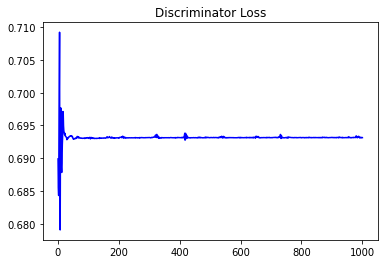

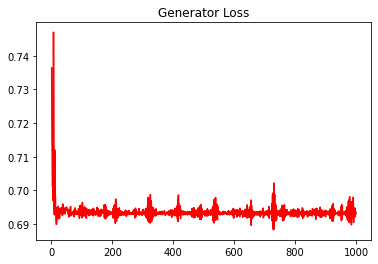

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0783609504363124


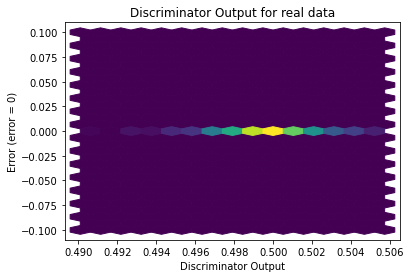

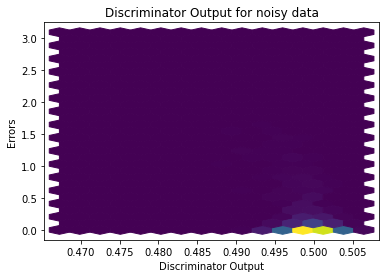

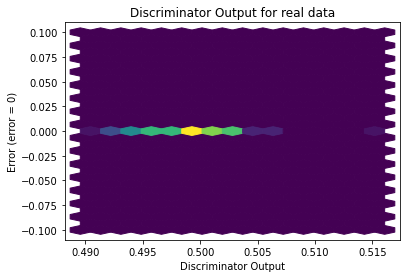

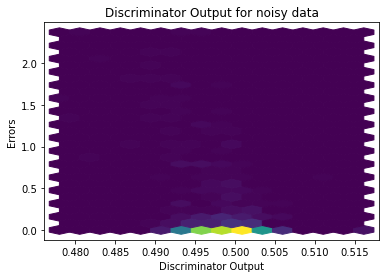

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


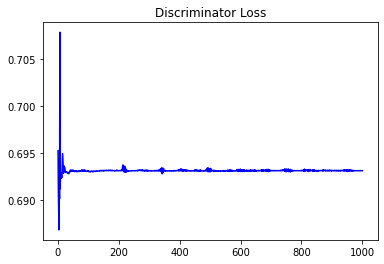

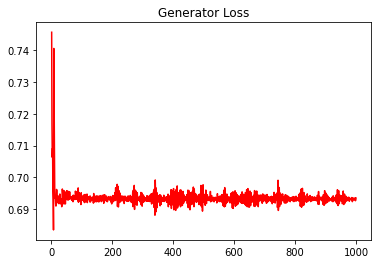

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08042836244608957


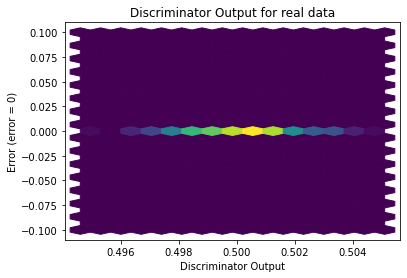

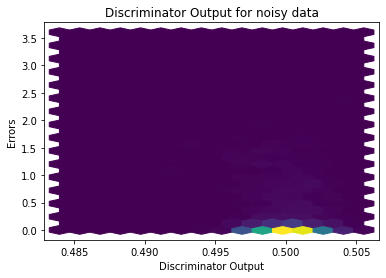

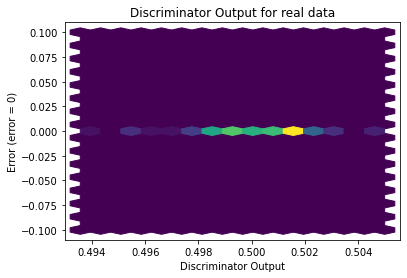

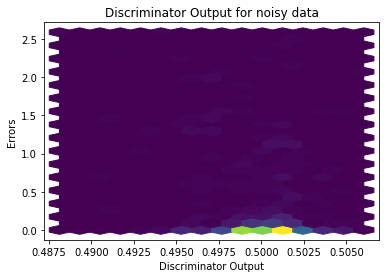

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2247]], requires_grad=True)
